In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("test_data.csv")

In [3]:
#入力変数と教師データに分割

In [4]:
#df.iloc[行,列]
x = df.iloc[:, :-1].values.astype("f")
t = df.iloc[:,-1].values.astype("f")

In [5]:
x.shape

(506, 13)

In [6]:
t = t.reshape(len(t),1)

In [7]:
#データセットの準備
dataset = list(zip(x,t))

In [8]:
#訓練データと検証データの分割
import chainer
import chainer.functions as F
import chainer.links as L

In [9]:
n_train = int(len(dataset)*0.7)
n_train

354

In [10]:
train, test = chainer.datasets.split_dataset_random(dataset, n_train, seed=0)
len(train)


354

In [11]:
#モデルの定義
class NN(chainer.Chain):
    #モデルの構造を明示
    def __init__(self):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, 1200)
            self.fc2 = L.Linear(1200, 800)
            self.fc3 = L.Linear(800, 300)
            self.fc4 = L.Linear(300, 1)
    #順伝播
    def __call__(self, x ):
        h = self.fc1(x)
        h = F.relu(h)
        h = self.fc2(h)
        h = F.relu(h)
        h = self.fc3(h)
        h = F.relu(h)
        h = self.fc4(h)
        return h

In [12]:
np.random.seed(0)
#インスタンス化
nn = NN()

In [13]:
model = L.Classifier(nn, lossfun=F.mean_squared_error)
model.compute_accuracy = False

学習に必要な準備

In [14]:
optimizer = chainer.optimizers.Adam() #確率的勾配降下法

In [15]:
optimizer.setup(model)

In [16]:
batchsize = 100

In [17]:
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

In [18]:
from chainer import training

In [19]:
updator = training.StandardUpdater(train_iter, optimizer, device=-1)

In [20]:
from chainer.training import extensions

In [21]:
#エポックの数
epoch = 3000 #学習回数

In [22]:
#trainerの宣言
trainer = training.Trainer(updator, (epoch, "epoch"), out="result/housing")

#検証データで評価
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))

trainer.extend(extensions.LogReport(trigger=(1, "epoch")))

#1エポックごと(trigger)にtrainデータに対するloss.accuracyとtestデータに対するloss.accuracy,経過時間を出力します
trainer.extend(extensions.PrintReport(["epoch", "main/loss", "validation/main/loss", "main/accuracy" ,"elapsed_time"]), trigger=(1, "epoch"))

# 学習の実行

In [23]:
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  elapsed_time
1           88210.6     33866.1                              0.244095      
2           16761       3426.07                              1.63673       
3           6333.58     5025.01                              1.83711       
4           1759.29     2728.29                              2.0656        
5           2728.99     953.011                              2.27756       
6           559.55      1686.5                               2.51474       
7           1295.12     367.464                              2.71723       
8           298.255     743.775                              2.96314       
9           615.329     181.223                              3.16655       
10          169.87      452.736                              3.41474       
11          349.362     137.957                              3.61012       
12          137.146     237.358                              3.89189       
13          14

108         39.8346     46.8575                              26.9291       
109         43.2275     47.8697                              27.1421       
110         42.5965     45.1226                              27.3967       
111         38.3627     45.8648                              27.6313       
112         39.3331     44.5014                              27.8814       
113         38.6985     47.2262                              28.1168       
114         42.8556     44.087                               28.3364       
115         38.4901     46.1125                              28.589        
116         37.0604     44.2711                              28.8055       
117         40.5717     48.4779                              29.0696       
118         38.0715     43.7979                              29.2815       
119         34.0431     49.6245                              29.5343       
120         40.8947     43.3007                              29.747        
121         

216         20.319      30.8312                              54.7567       
217         22.6221     31.3814                              55.0566       
218         26.7246     31.2112                              55.281        
219         22.9264     34.6831                              55.5562       
220         25.4825     30.5711                              55.7901       
221         23.1733     30.3458                              56.0686       
222         22.33       30.4517                              56.3035       
223         22.8632     30.8218                              56.5884       
224         23.2185     35.6292                              56.826        
225         27.663      30.2489                              57.1132       
226         25.9364     32.7591                              57.4167       
227         22.9666     32.3056                              57.6625       
228         24.0742     31.8202                              57.9671       
229         

324         17.2157     24.3086                              84.8565       
325         20.2685     23.5438                              85.3005       
326         17.2869     25.0312                              85.7185       
327         16.5219     23.9767                              86.7735       
328         18.8232     24.7828                              87.1206       
329         18.0273     28.53                                87.368        
330         19.3366     23.9852                              87.8534       
331         19.0001     25.3443                              88.0871       
332         20.9641     25.8963                              88.3868       
333         17.6973     23.1602                              88.666        
334         18.0236     23.4896                              88.994        
335         17.1822     22.6945                              89.3559       
336         16.3371     22.3455                              89.6303       
337         

432         17.0856     18.6456                              116.402       
433         15.7684     23.0054                              116.628       
434         18.661      24.7091                              116.915       
435         19.5373     21.1677                              117.141       
436         20.7917     20.7042                              117.492       
437         17.2887     22.7587                              117.789       
438         14.6093     21.3261                              118.063       
439         18.3215     18.8739                              118.351       
440         11.3077     20.2109                              118.585       
441         14.3809     18.6602                              118.864       
442         14.8535     22.9107                              119.115       
443         16.1358     27.0768                              119.455       
444         21.2262     18.8653                              119.688       
445         

540         14.6948     19.0621                              146.019       
541         13.5458     16.7247                              146.293       
542         12.3945     17.7359                              146.527       
543         14.2586     16.8125                              146.823       
544         13.2085     16.59                                147.102       
545         12.9665     19.3108                              147.384       
546         15.4682     26.1867                              147.629       
547         19.7809     22.6787                              147.968       
548         14.0969     21.8709                              148.199       
549         13.376      19.9139                              148.487       
550         14.303      17.1157                              148.731       
551         17.8975     16.2085                              149.021       
552         12.3202     17.0705                              149.333       
553         

648         12.405      17.0818                              175.843       
649         11.7326     16.0394                              176.142       
650         12.0853     15.3673                              176.412       
651         11.3683     16.285                               176.706       
652         10.9676     15.3066                              177.015       
653         13.6103     20.4276                              177.254       
654         14.2571     18.7485                              177.547       
655         13.7252     17.2445                              177.801       
656         14.0562     18.7812                              178.092       
657         14.0606     14.9632                              178.347       
658         11.1653     15.3019                              178.66        
659         12.9405     17.0481                              178.911       
660         11.9588     16.8695                              179.207       
661         

756         13.9793     17.2265                              206.621       
757         12.44       15.1968                              206.88        
758         17.4419     29.2186                              207.192       
759         19.3019     20.9186                              207.451       
760         14.6769     18.712                               207.751       
761         11.5848     15.6532                              208.017       
762         13.3233     15.1289                              208.334       
763         15.191      27.5226                              208.636       
764         21.4911     20.6668                              208.901       
765         14.2297     20.8535                              209.194       
766         15.9792     15.7642                              209.449       
767         12.2511     15.3565                              209.759       
768         14.3002     28.4272                              210.026       
769         

864         18.8915     24.3937                              238.853       
865         16.9878     44.081                               239.197       
866         33.9148     16.6438                              239.468       
867         21.8994     19.2414                              239.787       
868         15.126      23.4871                              240.069       
869         15.9663     22.5312                              240.405       
870         13.1548     15.1418                              240.683       
871         13.9974     15.9711                              240.998       
872         12.5351     15.5627                              241.278       
873         11.1133     15.552                               241.597       
874         13.1144     15.0886                              241.871       
875         9.72256     14.5504                              242.188       
876         13.7129     14.5718                              242.495       
877         

972         14.4208     17.9157                              272.133       
973         11.4616     15.2738                              272.453       
974         11.7392     19.4063                              272.743       
975         16.1091     18.1355                              273.056       
976         13.2827     17.4622                              273.374       
977         11.7261     14.3624                              273.646       
978         13.2657     15.311                               273.959       
979         13.1434     19.2142                              274.24        
980         10.8171     20.2987                              274.554       
981         12.5396     14.7752                              274.834       
982         12.0481     14.2549                              275.158       
983         10.8891     20.4047                              275.531       
984         12.0645     15.3249                              275.848       
985         

1080        12.8485     16.8731                              306.056       
1081        10.7394     13.7924                              306.353       
1082        11.2783     13.4737                              306.695       
1083        9.68615     17.7996                              306.975       
1084        11.1329     16.0269                              307.331       
1085        13.1154     14.4706                              307.628       
1086        9.85997     14.1463                              307.953       
1087        9.81683     14.3617                              308.247       
1088        9.80478     13.6441                              308.597       
1089        10.1899     13.4047                              308.921       
1090        9.59058     15.1649                              309.218       
1091        9.67339     13.5969                              309.559       
1092        10.3197     18.3081                              309.844       
1093        

1188        13.6405     20.5332                              342.946       
1189        14.9243     15.0744                              343.287       
1190        12.0804     15.6561                              343.596       
1191        11.138      16.8069                              343.936       
1192        9.40159     17.1114                              344.242       
1193        11.4468     23.484                               344.572       
1194        22.0423     20.9538                              344.898       
1195        12.3378     17.3742                              345.24        
1196        14.9127     15.2291                              345.538       
1197        11.7678     15.1335                              345.877       
1198        9.98133     15.2729                              346.181       
1199        19.0027     53.0274                              346.543       
1200        33.1277     19.1374                              346.858       
1201        

1296        18.9883     19.6434                              379.191       
1297        12.3632     13.7981                              379.563       
1298        12.7619     20.1715                              379.893       
1299        13.7227     17.6764                              380.272       
1300        11.7531     14.7711                              380.59        
1301        10.5664     14.3292                              380.947       
1302        8.59657     13.2766                              381.301       
1303        9.29029     13.8087                              381.664       
1304        8.5039      15.3474                              382.033       
1305        11.5143     13.7146                              382.368       
1306        10.6913     14.0983                              382.703       
1307        9.66191     15.0931                              383.027       
1308        10.963      13.86                                383.374       
1309        

1404        9.59422     15.1579                              418.354       
1405        10.427      14.538                               418.666       
1406        8.81293     13.3078                              419.028       
1407        7.8434      13.487                               419.352       
1408        8.32341     14.0791                              419.735       
1409        10.4775     15.9168                              420.048       
1410        10.1639     14.5044                              420.412       
1411        9.864       13.1576                              420.731       
1412        8.43534     15.6751                              421.092       
1413        10.7615     17.0283                              421.462       
1414        10.4393     13.0686                              421.791       
1415        9.93933     16.4666                              422.153       
1416        11.1834     13.2696                              422.464       
1417        

1512        8.81118     14.4608                              457.47        
1513        10.4994     17.043                               457.841       
1514        13.99       14.1299                              458.167       
1515        10.2538     21.0284                              458.544       
1516        16.8171     13.1175                              458.883       
1517        13.9766     23.9224                              459.316       
1518        20.0349     16.0013                              459.64        
1519        12.0718     19.1142                              460.003       
1520        10.5634     16.372                               460.322       
1521        12.6001     18.8413                              460.767       
1522        11.3737     21.0689                              461.111       
1523        14.7576     13.3692                              461.471       
1524        12.2076     14.3111                              461.793       
1525        

1620        8.45583     11.7193                              497.172       
1621        7.41298     14.1938                              497.555       
1622        10.2068     12.1089                              497.949       
1623        7.28978     12.5637                              498.331       
1624        8.81068     12.1549                              498.68        
1625        7.87152     12.0715                              499.069       
1626        9.53309     13.6998                              499.489       
1627        8.46        12.5877                              499.823       
1628        8.34511     11.7402                              500.189       
1629        9.4177      14.4976                              500.566       
1630        11.5341     13.199                               500.994       
1631        11.1056     13.4555                              501.331       
1632        9.57909     14.963                               501.798       
1633        

1728        7.92304     11.7294                              540.323       
1729        7.387       11.8295                              540.79        
1730        6.59858     11.6878                              541.263       
1731        9.29047     18.0806                              541.729       
1732        12.0842     17.3784                              542.198       
1733        9.40675     14.2278                              542.59        
1734        8.59285     13.0966                              543.035       
1735        9.7711      13.4393                              543.451       
1736        10.3905     16.8609                              543.909       
1737        12.2556     12.8633                              544.325       
1738        8.73691     10.957                               544.722       
1739        6.47238     11.0829                              545.131       
1740        7.97289     11.9894                              545.477       
1741        

1836        8.08131     12.711                               584.587       
1837        10.2459     11.688                               584.964       
1838        7.97091     11.0459                              585.36        
1839        7.96133     10.11                                585.767       
1840        6.95352     10.1858                              586.138       
1841        5.84362     11.1624                              586.552       
1842        7.25233     11.0092                              586.901       
1843        6.52443     10.6475                              587.292       
1844        7.22244     15.1257                              587.653       
1845        9.52801     13.7598                              588.068       
1846        8.57738     10.891                               588.434       
1847        7.62816     11.3757                              588.847       
1848        6.6295      11.6483                              589.2         
1849        

1944        7.17131     11.5069                              628.78        
1945        7.91798     11.1363                              629.202       
1946        6.64255     9.9965                               629.602       
1947        6.29634     17.0831                              630.025       
1948        8.63277     10.5124                              630.501       
1949        8.99262     12.1554                              630.907       
1950        8.76295     10.8573                              631.284       
1951        6.93615     15.8698                              631.732       
1952        11.9674     15.8592                              632.133       
1953        9.87932     11.934                               632.501       
1954        6.95381     12.5044                              632.937       
1955        9.11328     13.3169                              633.328       
1956        7.44818     15.1064                              633.733       
1957        

2052        6.93625     13.3343                              675.491       
2053        8.20788     14.315                               675.873       
2054        7.79536     11.4739                              676.331       
2055        6.73674     11.7643                              676.749       
2056        6.16612     10.9856                              677.218       
2057        5.46617     9.53373                              677.652       
2058        7.09067     10.0213                              678.097       
2059        5.54869     12.6442                              678.492       
2060        6.42094     13.1041                              678.934       
2061        7.14037     10.0224                              679.338       
2062        8.03228     12.1154                              679.787       
2063        8.37539     12.276                               680.232       
2064        8.42854     10.4079                              680.624       
2065        

2160        9.96196     15.9864                              722.868       
2161        7.69939     13.6306                              723.298       
2162        10.3638     12.7797                              723.778       
2163        6.81141     12.6253                              724.296       
2164        8.15119     11.4598                              724.705       
2165        10.3225     13.8341                              725.16        
2166        6.58865     12.935                               725.565       
2167        7.41701     10.9893                              725.997       
2168        6.38059     14.1409                              726.404       
2169        7.19266     11.601                               726.881       
2170        6.19024     11.7208                              727.281       
2171        6.92507     11.0592                              727.786       
2172        7.17167     12.4294                              728.212       
2173        

2268        6.47644     9.9129                               771.903       
2269        4.94308     10.5151                              772.431       
2270        5.10908     14.5385                              772.84        
2271        6.21011     12.4524                              773.278       
2272        6.12592     9.99221                              773.693       
2273        5.74428     10.7103                              774.134       
2274        5.18712     9.94768                              774.542       
2275        4.33942     10.2636                              775.021       
2276        4.88847     9.54923                              775.486       
2277        4.10683     9.32415                              775.947       
2278        5.12131     11.8136                              776.392       
2279        5.17156     10.5278                              776.921       
2280        4.88286     10.9813                              777.393       
2281        

2376        4.54773     9.20958                              822.35        
2377        4.22943     10.7238                              822.766       
2378        3.68128     10.7294                              823.281       
2379        4.48374     10.2118                              823.77        
2380        3.79477     9.22434                              824.273       
2381        4.11982     10.2719                              824.716       
2382        3.64974     9.45742                              825.182       
2383        3.44532     9.95019                              825.598       
2384        3.4568      9.47426                              826.137       
2385        3.93741     10.5674                              826.582       
2386        4.0287      10.4124                              827.1         
2387        5.99551     11.1956                              827.52        
2388        5.01066     10.3711                              827.981       
2389        

2484        6.91805     12.1496                              873.139       
2485        6.7946      10.5839                              873.559       
2486        6.55292     10.413                               874.026       
2487        6.264       12.5619                              874.544       
2488        11.2888     12.4157                              875.025       
2489        10.7371     19.0533                              875.492       
2490        9.11751     10.6498                              875.921       
2491        6.6359      13.6964                              876.411       
2492        8.41929     9.68952                              876.85        
2493        8.06674     18.8528                              877.322       
2494        8.31084     13.1734                              877.74        
2495        8.6185      21.1325                              878.321       
2496        15.4026     39.7169                              878.752       
2497        

2592        3.78562     10.6341                              927.107       
2593        2.96042     10.3232                              927.738       
2594        3.63053     9.89606                              928.167       
2595        3.21872     11.2703                              928.668       
2596        3.87054     9.78642                              929.127       
2597        3.18085     10.3411                              929.633       
2598        4.01422     10.1468                              930.098       
2599        3.14519     9.55448                              930.594       
2600        2.86806     9.31455                              931.038       
2601        3.05355     10.4368                              931.52        
2602        3.47452     10.1445                              932.013       
2603        3.52246     10.0097                              932.447       
2604        3.00388     10.8059                              932.937       
2605        

2700        6.73878     14.0904                              979.903       
2701        7.19088     12.4915                              980.421       
2702        5.26599     9.79236                              980.913       
2703        4.16638     11.474                               981.367       
2704        4.18138     10.6096                              981.859       
2705        5.21455     10.5615                              982.333       
2706        7.52339     10.9658                              982.833       
2707        5.68317     11.1868                              983.283       
2708        5.79378     10.9879                              983.777       
2709        6.78983     11.6741                              984.211       
2710        4.80445     12.9569                              984.7         
2711        6.64669     11.5237                              985.203       
2712        6.75339     17.1874                              985.709       
2713        

2808        4.53767     9.10919                              1036.7        
2809        3.5813      13.0397                              1037.16       
2810        4.92232     15.7245                              1037.66       
2811        5.65195     11.5272                              1038.12       
2812        4.88914     10.1784                              1038.61       
2813        3.68045     9.91016                              1039.12       
2814        3.07922     11.3423                              1039.58       
2815        4.03281     10.02                                1040.09       
2816        3.92665     14.1964                              1040.56       
2817        6.07508     16.2704                              1041.04       
2818        6.64745     9.37439                              1041.53       
2819        5.86077     10.98                                1042.03       
2820        4.38149     10.0511                              1042.49       
2821        

2916        5.06434     11.0638                              1092.36       
2917        6.29251     11.6949                              1092.87       
2918        6.41082     16.5619                              1093.33       
2919        6.4062      11.3592                              1093.83       
2920        6.90353     14.3393                              1094.31       
2921        7.49234     13.6936                              1094.84       
2922        6.42712     18.6337                              1095.3        
2923        8.08665     24.421                               1095.82       
2924        11.3364     18.9023                              1096.34       
2925        8.35362     15.2679                              1096.91       
2926        10.0505     16.3374                              1097.47       
2927        7.89979     10.4434                              1097.97       
2928        5.22111     14.6373                              1098.53       
2929        

In [24]:
import json

In [25]:
with open("result/housing/log") as f:
    logs = json.load(f)
    results = pd.DataFrame(logs)

In [26]:
results.head()

,elapsed_time,epoch,iteration,main/loss,validation/main/loss
0,0.244095,1,4,88210.556763,33866.132812
1,1.636733,2,8,16760.990105,3426.070923
2,1.837109,3,11,6333.580648,5025.011475
3,2.065596,4,15,1759.285213,2728.285522
4,2.277562,5,18,2728.994303,953.011322


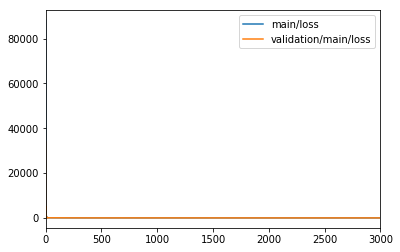

In [27]:
results[["main/loss", "validation/main/loss"]].plot()

In [28]:
loss = results["validation/main/loss"].values[-1]
loss

9.926308155059814

In [29]:
import math

In [30]:
math.sqrt(loss)

3.150604411070964

In [31]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
from chainer import serializers,Chain
chainer.serializers.save_npz("models/housing.npz", model)

# 学習済みモデルのロード

In [33]:
#モデルの構造を明示
model = L.Classifier(NN())

In [34]:
chainer.serializers.load_npz("models/housing.npz", model)

# 予測値の計算

In [35]:
#今回は一番最初のサンプルに対する予測値の計算を行う

In [77]:
x_new = x[2]

In [78]:
x_new.shape

(13,)

In [79]:
x_new = x_new[np.newaxis]

In [80]:
x_new.shape

(1, 13)

In [81]:
y = model.predictor(x_new)

In [82]:
y

variable([[33.23248]])

In [76]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
